## Social_Analytics - Distinguishing Sentiments


## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  



In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import tweepy
import API_Keys
import numpy as np
from datetime import datetime

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = API_Keys.Twitter_Key
consumer_secret = API_Keys.Twitter_Secret
access_token = API_Keys.Twitter_Token
access_token_secret = API_Keys.Twitter_Token_Secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
sentiment_df=[]

In [5]:
# Target News Network
users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes") 
sentiment= []


In [6]:


for user in users:
    try:
        #Get Tweets from feeds
        public_tweets = api.user_timeline(user,count = 100, result_type="recent")
        
        #Set counter
        counter = 100
            
        for tweet in public_tweets:
            text = tweet['text']
            time = tweet['created_at']
            date = datetime.strptime(time, '%a %b %d %H:%M:%S %z %Y').date()
            
        #Run Vader analysis
            scores = analyzer.polarity_scores(text)
                
            
        #Add Value to appropriate list
            scores['Data_Source'] = user
            scores['Date'] = date
            scores['tweet'] = counter
            counter -=1
                
                
            sentiment.append(scores)
                
            
    except tweepy.TweepError:
        print("Failed to run the command on that user, Skipping...")
    continue
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,Data_Source,Date,compound,neg,neu,pos,tweet
0,@BBC,2017-12-10,0.6915,0.000,0.560,0.440,100
1,@BBC,2017-12-10,0.0000,0.000,1.000,0.000,99
2,@BBC,2017-12-10,0.4391,0.000,0.855,0.145,98
3,@BBC,2017-12-10,-0.3818,0.126,0.874,0.000,97
4,@BBC,2017-12-10,0.0000,0.000,1.000,0.000,96


In [7]:
pivot_df = sentiment_df.pivot(index='tweet',columns='Data_Source',values='compound')
pivot_df

Data_Source,@BBC,@CBS,@CNN,@FoxNews,@nytimes
tweet,,,,,
1,0.0000,0.0000,0.0000,0.0000,0.0772
2,0.4939,0.6289,0.4588,0.0000,0.7351
3,0.6808,0.9476,0.5574,0.3182,-0.5972
4,0.0000,0.5106,-0.4939,0.0000,0.0000
5,0.0000,0.5826,0.0516,-0.4019,-0.5423
6,0.5106,0.4201,-0.3182,-0.0772,0.0000
7,0.4588,0.6696,-0.0253,0.0000,-0.2960
8,0.4767,0.6696,0.0000,-0.6597,0.0000
9,0.0000,0.4926,-0.6597,0.0000,0.4767


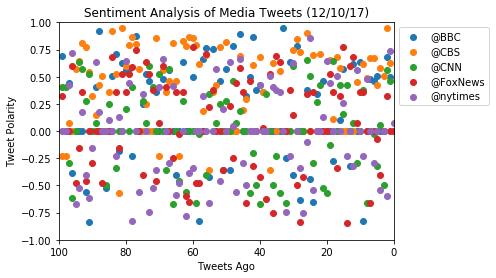

In [10]:
x = np.arange(100)

plt.scatter(x,pivot_df['@BBC'],marker='o')
plt.scatter(x,pivot_df['@CBS'],marker='o')
plt.scatter(x,pivot_df['@CNN'],marker='o')
plt.scatter(x,pivot_df['@FoxNews'],marker='o')
plt.scatter(x,pivot_df['@nytimes'],marker='o')

#Plot labels
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.title("Sentiment Analysis of Media Tweets (12/10/17)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid=True
plt.xlim([100,0])
plt.ylim([-1,1])

#Save Plot
plt.savefig("Tweet.png")

plt.show()


In [11]:
group_df = sentiment_df.groupby('Data_Source').mean()
group_df = group_df['compound']
group_df

Data_Source
@BBC        0.170004
@CBS        0.374197
@CNN        0.020133
@FoxNews    0.072199
@nytimes   -0.007443
Name: compound, dtype: float64

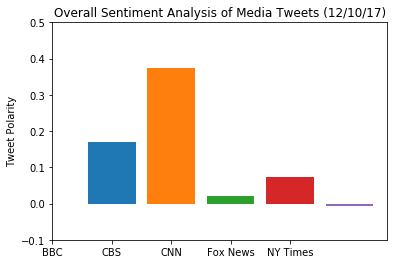

In [15]:

plt.bar(1,group_df['@BBC'])
plt.bar(2,group_df['@CBS'])
plt.bar(3,group_df['@CNN'])
plt.bar(4,group_df['@FoxNews'])
plt.bar(5,group_df['@nytimes'])


plt.title("Overall Sentiment Analysis of Media Tweets (12/10/17)")
plt.ylabel("Tweet Polarity")
plt.xticks(np.arange(5), ('BBC', 'CBS', 'CNN', 'Fox News', 'NY Times') )
plt.ylim(-.1,.5)
plt.savefig("Overall.png")
plt.show()